# Генерация выборки из заданного распределения

In [2]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1
random = [rng() for i in range(1000)]

import matplotlib.pyplot as plt
import numpy as np
import time
import math
from scipy.stats import expon
from scipy import stats
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle

Задача. Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

Time spent on generation in case 1 =  0.0038232803344726562
Time spent on generation in case 2 =  0.002064228057861328


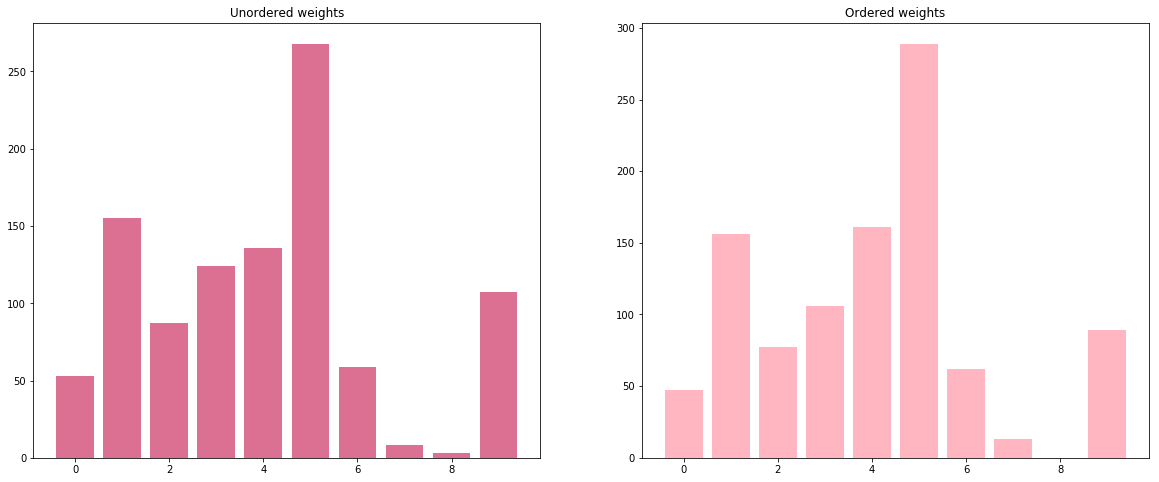

In [11]:
a = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
a/=a.sum()
b = [a[:i].sum() for i in range(1,11)]
r = [np.random.rand() for i in range(1000)]
c = []
start=time.time()
for i in range(1000):
    k=0
    while k!=-1:
        if r[i]<b[k]:
            c.append(k)
            k=-1
        else:
            k+=1
end = time.time()

plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
print("Time spent on generation in case 1 = ", end-start)
plt.bar(np.arange(10), [c.count(i) for i in range(10)], color='palevioletred')
plt.title("Unordered weights")

ind = np.argsort(a)[::-1]
a = np.sort(a)[::-1]
b = [a[:i].sum() for i in range(1,11)]
r = [np.random.rand() for i in range(1000)]
c = []
start = time.time()
for i in range(1000):
    k=0
    while k!=-1:
        if r[i]<b[k]:
            c.append(k)
            k=-1
        else:
            k+=1
end = time.time()

plt.subplot(1, 2, 2)
print("Time spent on generation in case 2 = ", end-start)
plt.bar(ind, [c.count(i) for i in range(10)], color='lightpink')
plt.title("Ordered weights")

plt.show()

# Inverse transform method

Задача. Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

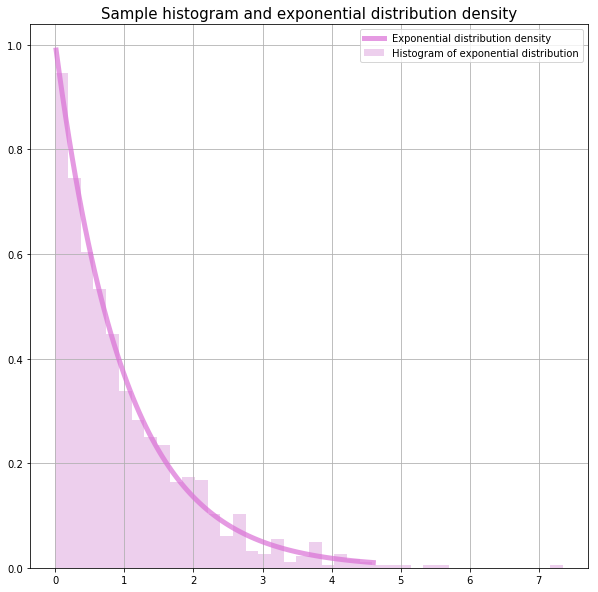

In [18]:
a = np.array([np.random.rand() for i in range(1000)])
b = np.array([-math.log(1-d[i]) for i in range (1000)])


plt.figure(figsize = (10, 10))
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
plt.hist(b, bins = 40, density=True, color = 'plum', alpha = 0.5, label = 'Histogram of exponential distribution')
plt.legend(loc='upper right')
plt.plot(a, expon.pdf(x), 'r-', lw=5, alpha=0.7, label='Exponential distribution density', color='orchid')
plt.legend(loc='upper right')
grid1 = plt.grid(True)
plt.title("Sample histogram and exponential distribution density", size=15)
plt.show()

# Rejection sampling (Accept-reject method)

Задача. Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

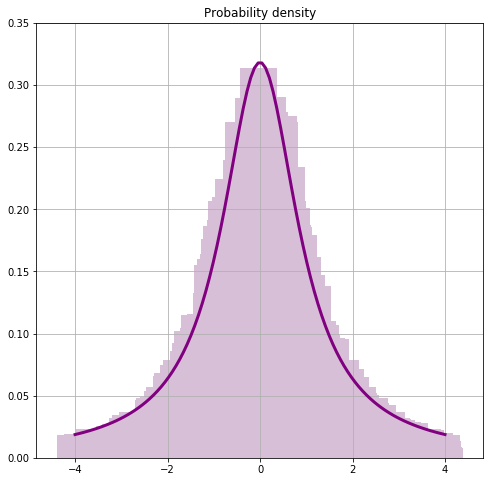

In [37]:
rand = [8*np.random.rand()-4 for i in range(1000)]
rand.sort()
my_cauchy = []
k=0
while k!=1000:
    z = 1/math.pi*np.random.rand()
    if z < 1/(math.pi*(1+rand[k]*rand[k])):
        my_cauchy.append(z)
        k+=1

plt.figure(figsize=(8,8))
plt.grid()

plt.title("Sample histogram")
plt.ylim(bottom=0)
plt.ylim(top=0.35)
plt.bar(rand, my_cauchy, color='thistle')


dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.title("Probability density")
plt.ylim(bottom=0)
plt.ylim(top=0.35)
plt.plot(x, dist.pdf(x), color='purple',  lw=3)

plt.show()

Обоснование метода:

    Плотность p(y|x) = 1 / (cg(x)) =>
    => считаем совместную плотность: совместная плотность p(x, y) = p(y|x) p(x) = 1/c, так как p(x) = g(x)
    Совместная плотность x и y под графиком функции f равна p(x,y|y < f) = p(x, y)/ p(y < f) = 1
    Плотность x при условии y < f это - интеграл от 0 до f(x) совместной плотности х и у, 
    => значит она равна f(x).

# Coordinate transformation method

Задача. Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

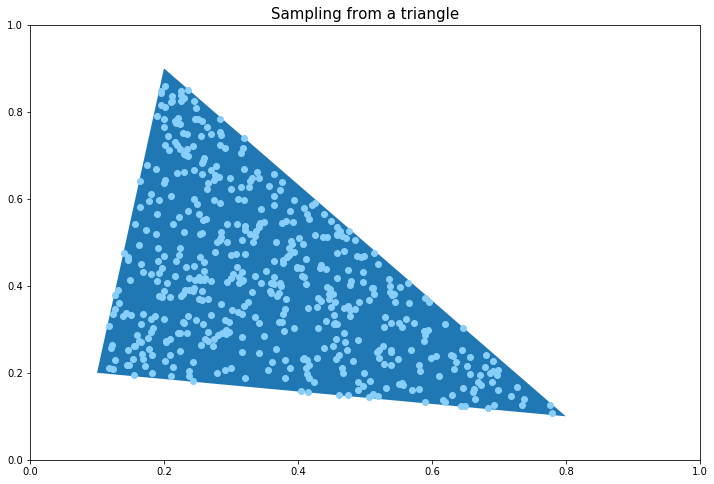

In [44]:
xx = np.array([np.random.rand() for i in range(500)])
yy = np.array([np.random.rand() for i in range(500)])

for i in range(500):
    if yy[i]>-xx[i]+1:
        xx[i]=-xx[i]+1
        yy[i]=-yy[i]+1
        
xx*=math.hypot(0.7, 0.1)
yy*=math.hypot(0.7, 0.1)

phi = math.atan2(-1, 7)
x = xrand
xx = xx*math.cos(a)-yy*math.sin(phi)+0.1
yy = x*math.sin(a)+yy*math.cos(phi)+0.2

fig=plt.figure(figsize=(12,8))

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(xx, yy,  color='lightskyblue')
plt.xlim(left=0)
plt.xlim(right=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.title("Sampling from a triangle", size=15)

plt.show()

Задача. Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

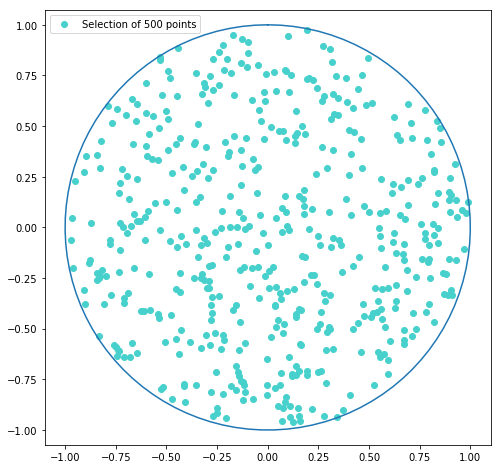

In [43]:
phi = np.linspace(0, 2 * np.pi, 100)

angle = 2*np.pi*np.random.rand(1, 500)
rad = np.sqrt(np.random.rand(1, 500))

x = rad*np.cos(angle)
y = rad*np.sin(angle)

fig = plt.figure(figsize=(8,8))
plt.plot(np.sin(phi), np.cos(phi))
plt.axis('equal')
plt.scatter(x, y, color='mediumturquoise', label='Selection of 500 points')
plt.legend(loc='upper left')
plt.show()

Задача. Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

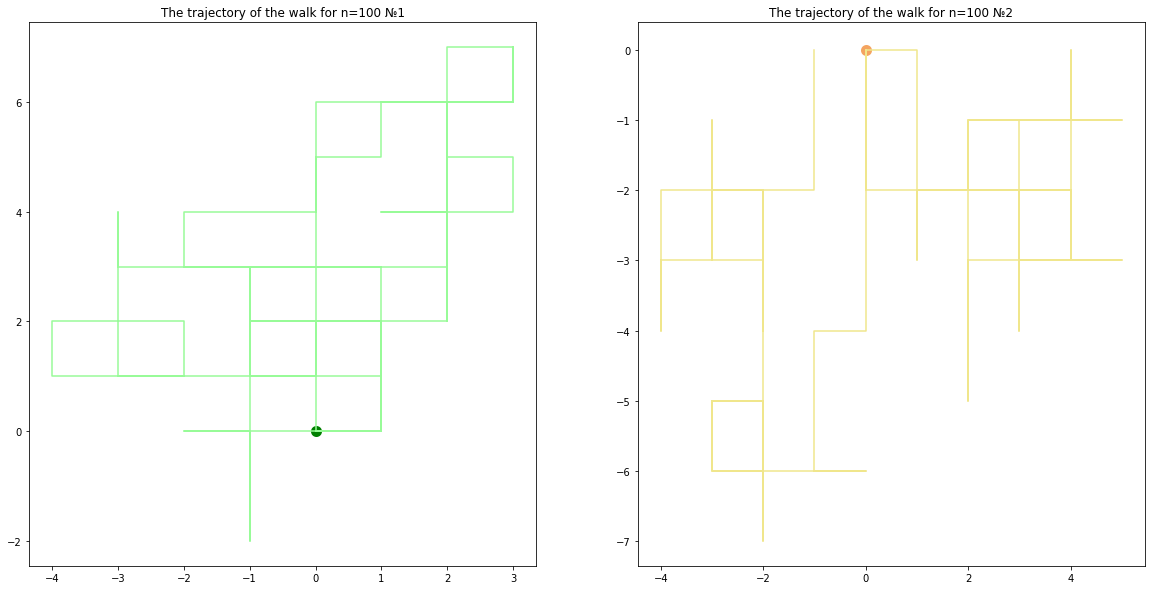

In [46]:
def random_walk(n):
    xi1 = np.random.choice(np.arange(n), n//2, replace = False)
    yi1 = np.random.choice(np.arange(n), n//2, replace = False)
    xi2 = np.ones(n)
    yi2 = np.ones(n)
    x2[-x1] = -1
    y2[-y1] = -1
    x1 = np.cumsum(xi2)
    y1 = np.cumsum(yi2)
    x2 = (x1+y1)/2
    y2 = (x1-y1)/2
    return x2,y2

x, y = random_walk(100)
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(x,y, color='palegreen')
plt.title("The trajectory of the walk for n=100 №1")
plt.scatter([0], [0], color='green', lw=5)
x, y = random_walk(100)

plt.subplot(1,2,2)
plt.plot(x,y,color='khaki')
plt.title("The trajectory of the walk for n=100 №2")
plt.scatter([0], [0], color='sandybrown', lw=5)

plt.show()

# Random normal generator

Задача. Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

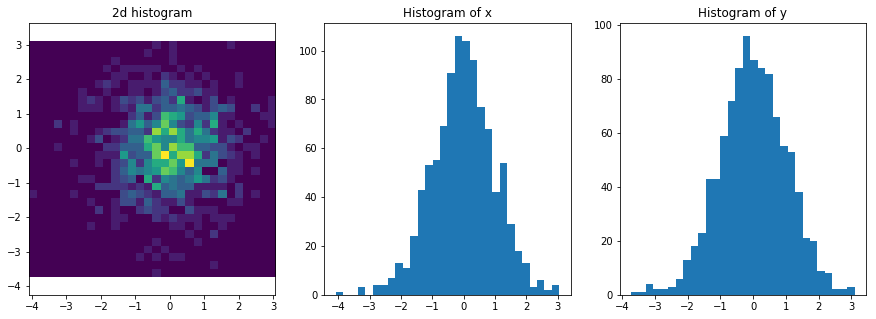

In [47]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Доказательство

    Посчитаем совместную плотность преобразованных величинx X = sqrt(-2ln(u1)) cos(2(pi)(u2)), Y = sqrt(-2ln(u1)sin(2(pi)(u2))).
    Посчитаем якобиан преобразования, обратим его, запишем через X и Y.
    Получим 1/(2pi) e^(-(X^2 + Y^2)/2). 
    Это совместная плотность, соответсвующая Гауссовскому многомерному стандартному распределению. 
    Утверждение доказано.

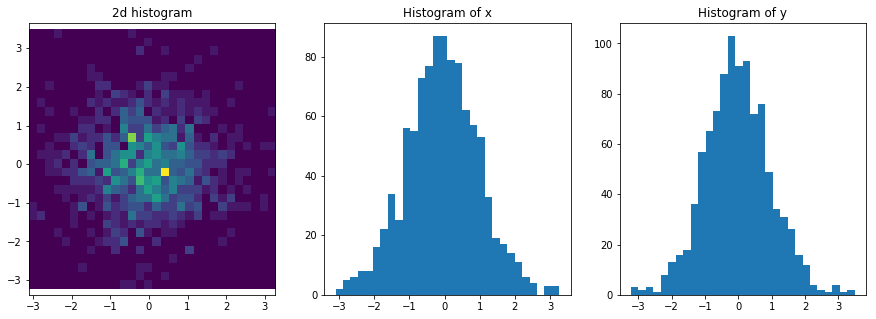

In [48]:
n = 1000
k = 0
x0 = []
y0 = []
while k<n:
    a1, a2 = 2*np.random.rand(2,1)-1
    s = a1 * a1 + a2 * a2
    if 0 < s <= 1:
        x0 = np.append(X_0, a1)
        y0 = np.append(Y_0, a2)
        k=k+1
s = x0 * x0 + y0 * y0
r = np.sqrt(-2 * np.log(s)/s)
x = x0 * r
y = y0 * r

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

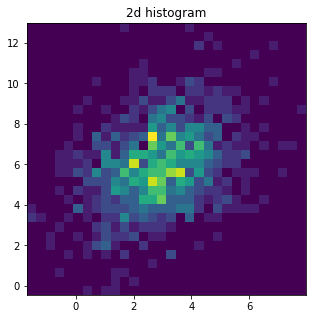

In [58]:
z = np.array([[2,1],[1,4]])
d = 2
c = np.sqrt(z[1][1] - d * d)
b = z[1][0] / d
a = np.sqrt(z[0][0] - b * b)

x1 = a * x + b * y + 3
y1 = c * x + d * y + 6

plt.figure(figsize=(5,5))
plt.hist2d(x1, y1, bins=30)
plt.title("2d histogram")
plt.show()

Задача. Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [55]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])


L = np.zeros((9,9))
L[0][0] = math.sqrt(B[0][0])
for k in range(1, 9):
    L[k][0] = B[k][0] / L[0][0]
for i in range(1, 9):
    s0 = 0.0
    for p in range(i):
        s0 = s0 + L[i][p] * L[i][p]
    k0 = math.sqrt(B[i][i] - s0)
    L[i][i] = k0
    if i != 8:
        for j in range(i+1, 9):
            s1 = 0.0
            for p in range(i):
                s1 = s1 + L[i][p] * L[j][p]
            k1 = B[j][i] - s1
            if abs(L[i][i]) > 1e-15:
                L[j][i] = k1 / L[i][i]
            else:
                print(i,j, 'PROBLEM')
print('The desired matrix L :')
print(L)
print('The resulting covariance matrix after vector transformation\n\
with this matrix (the resulting covariance matrix coincides with the given one)')
F = L.dot(np.transpose(L))
print(F)

The desired matrix L :
[[ 1.41421356  0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          2.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          2.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -0.5         0.          1.93649167  0.          0.
   0.          0.          0.        ]
 [-0.70710678  0.          0.          0.          1.22474487  0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          2.
   0.          0.          0.        ]
 [ 0.          0.         -0.5         0.          0.          0.
   1.93649167  0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.5
   0.          1.93649167  0.        ]
 [-0.70710678  0.          0.          0.         -1.22474487  0.
   0.          0.          0.        ]]
The resulting covariance matri

Задача. С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число  π . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число  π  с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

    Пусть величина X равна 1, если точка попала в круг, и 0 иначе.
    P{X=1} = p = pi/4
    P{X=0} = q = 1 - pi/4
    EX = p
    DX = pq
    Пусть Y - сумма N таких величин =>
    Тогда EY = Np, DY = Npq
    Z = Y / N 
    EZ = p
    DZ = p q / N
    По неравеству Чебышева имеем: P{|Z - EZ| > eps} < DZ / eps^2
    Тогда P{|Z - EZ| < eps} > 1 - DZ/ eps^2 N>= pi/4 (1 - pi/4) / (delta (eps/4)^2) = pi (4 - pi)/ (delta eps^2) pi > 3
    Тогда N >= 3/ (deltaeps^2) delta = 0.01, eps = 0.0005
    Вывод: понадобится около 1 миллиона бросков.

In [17]:
N= 300000


x = []
for i in range (N):
    a, b = 2*np.random.rand(2, 1) - 1
    s = a * a + b * b
    if s <= 1:
        x = np.append(x, 0)
my_pi = 4.0 * len(x) / N
print(round(my_pi, 3))

3.146


    На 600000 мой компьютер считать уже не хочет, поэтому проверить метод для миллиона бросков я не смогу.

Задача. Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

In [16]:
n = 100

def subsets(n):
    Bells_number = 0
    x=[]
    for k in range(1,n):
        Bells_number+=k**n/np.math.factorial(k)
    Bells_number*=1/np.exp(1)
    part = np.array([k**n/(np.math.factorial(k)*np.exp(1)*Bells_number) for k in range(1,n+1)])
    summ_p = np.cumsum(part)
    
    r = np.random.rand()
    k=0
    while k!=-1:
        if r<summ_p[k]:
            r = k+1
            k=-1
        else:
            k+=1
    
    part = np.array([1/r for i in range(r)])
    summ_p = np.cumsum(part)
    a = np.array([np.random.rand() for i in range(n)])
    
    for i in range(n):
        k=0
        while k!=-1:
            if a[i]<summ_p[k]:
                x = np.append(x, k)
                k=-1
            else:
                k+=1
    return x


mean_count = 0
for i in range(2000):
    x = subsets(n)
    mean_count += len(np.unique(x))
print(mean_count / 2000)

28.703
